In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import norm

from implementation.LogRegCCD import LogRegCCD
from implementation.measures import Measure

np.random.seed(666)

In [2]:
n = 1000
p = 3

In [3]:
beta0 = 0.5
beta = np.ones(p)

In [4]:
X = np.random.multivariate_normal(np.zeros(p), np.diag(np.ones(p)), n)
probs = norm.cdf(beta0 + X @ beta)
y = np.random.binomial(1, probs)

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.6)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.25)

In [6]:
print(X_train.shape)
X_train[:10]

(600, 3)


array([[-0.96876747, -0.3631096 ,  0.47779402],
       [-0.13817951, -0.3896831 ,  0.62529353],
       [ 0.54562661, -1.38339725, -0.94211545],
       [-0.88769796,  0.23038707, -0.5576609 ],
       [-0.26870953, -0.22712003,  0.78354728],
       [ 1.0606901 , -0.26447454, -1.17463405],
       [-0.69968442,  1.50219938,  0.85848462],
       [ 0.94592341,  1.20409101, -0.45124074],
       [ 0.7935847 , -1.25461172,  0.3139537 ],
       [-0.34183785,  0.41961326,  0.25040021]])

In [7]:
print(y_train.shape)
y_train[:10]

(600,)


array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0], dtype=int32)

In [8]:
print(X_valid.shape)
X_valid[:10]

(300, 3)


array([[ 0.12125563, -0.21640577,  0.71508469],
       [-0.75168303,  0.74836978,  0.58268265],
       [-1.45595507, -0.55153968,  0.07379456],
       [ 0.85886339, -0.24988414, -0.44319729],
       [ 1.02824637,  0.28865515,  2.20583252],
       [-0.62601885, -0.30969794, -1.22318629],
       [ 0.0796555 ,  0.47571777,  0.8749226 ],
       [-1.01668102,  1.27823798,  1.73144508],
       [ 0.6401937 , -0.66789741, -1.6006256 ],
       [-0.37042043,  0.75849075, -1.97089255]])

In [9]:
print(y_valid.shape)
y_valid[:10]

(300,)


array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0], dtype=int32)

In [10]:
print(X_test.shape)
X_test[:10]

(100, 3)


array([[ 1.01438158, -0.60717066, -1.18481057],
       [-0.27664196,  1.36635207, -0.32111397],
       [ 0.41711912, -0.12791884, -1.09595971],
       [-0.11798261,  1.41071207, -0.51838402],
       [ 0.62750951, -0.77473689,  0.1040863 ],
       [-0.91862572, -0.99276438, -0.32332484],
       [ 0.53321231, -1.02071279,  0.65030569],
       [ 0.3921333 ,  0.00792905,  0.13427205],
       [-0.40134179, -2.42723042, -0.98586844],
       [ 1.20811088,  0.024162  , -0.529304  ]])

In [11]:
print(y_test.shape)
y_test[:10]

(100,)


array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1], dtype=int32)

In [12]:
model1 = LogRegCCD().fit(X_train, y_train)

In [13]:
print(model1.beta0_, *model1.beta_)

0.26826398659467937 0.22067296510493423 0.1989018662630946 0.1924195481999713


In [14]:
accuracy_score(y_valid, model1.predict(X_valid))

0.8266666666666667

In [15]:
model2 = LogisticRegression().fit(X_train, y_train)

In [16]:
print(model2.intercept_, *model2.coef_)

[0.75839821] [1.85553105 1.86024185 1.70893581]


In [17]:
accuracy_score(y_valid, model2.predict(X_valid))

0.8666666666666667

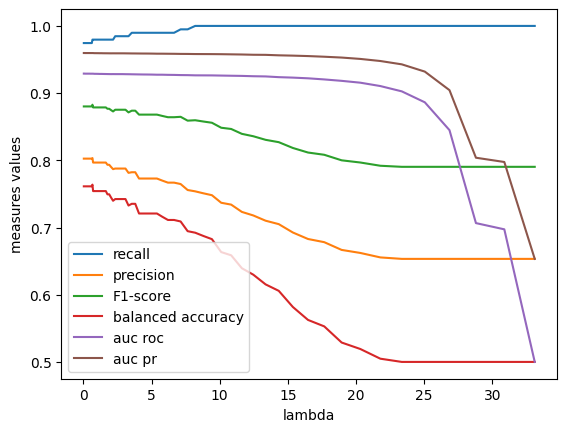

In [18]:
LogRegCCD.plot(X_train, y_train, X_valid, y_valid, list(Measure.Type))

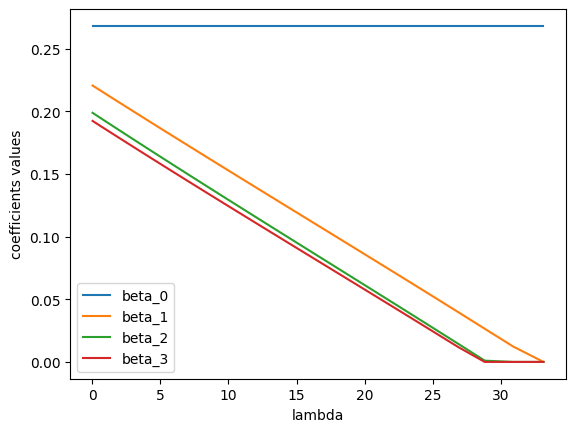

In [19]:
LogRegCCD.plot_coefficients(X_train, y_train)

In [20]:
# ?LogRegCCD
print(LogRegCCD.__doc__)

 
    Logistic Regression classifier using cyclic coordinate descend optimization method.
    
    This class implements regularized logistic regression with Elastic-Net penalty.
    
    Parameters
    ----------    
    C : float, default=None
        Inverse of regularization strength; must be a positive float.
        Like in support vector machines, smaller values specify stronger
        regularization.
    
    alpha : float, default=1.0
        The Elastic-Net mixing parameter, with ``0 <= alpha <= 1``.
        Setting ``alpha=0`` is equivalent to having ridge regularization (L2),
        while setting ``alpha=1`` is equivalent to having lasso
        regularization (L1). For ``0 < alpha <1``, the penalty is a
        combination of L1 and L2.

    Attributes
    ----------
    beta_ : ndarray of shape (n_features, )
        Coefficient of the features in the decision function.
    
    beta0_ : float
        Intercept (a.k.a. bias) added to the decision function.
    
        

In [21]:
# ?LogRegCCD.fit
print(LogRegCCD.fit.__doc__)


        Fit the model according to the given training data.
        
        Parameters
        ----------
        X : {array-like, sparse matrix} of shape (n_samples, n_features)
            Training vector, where `n_samples` is the number of samples and
            `n_features` is the number of features.
        
        y : array-like of shape (n_samples,)
            Target vector relative to X.
            
        max_iter : int, default=100
            Maximum number of iterations taken for the solvers to converge.

        use_weights: bool, default=True
            Specifies if method should use weights optimization.
            If `use_weights` is False, then each sample is given unit weight.
            
        fit_intercept : bool, default=True
            Specifies if a constant (a.k.a. bias or intercept) should be
            added to the decision function.

        Returns
        -------
        self
            Fitted estimator.
        
